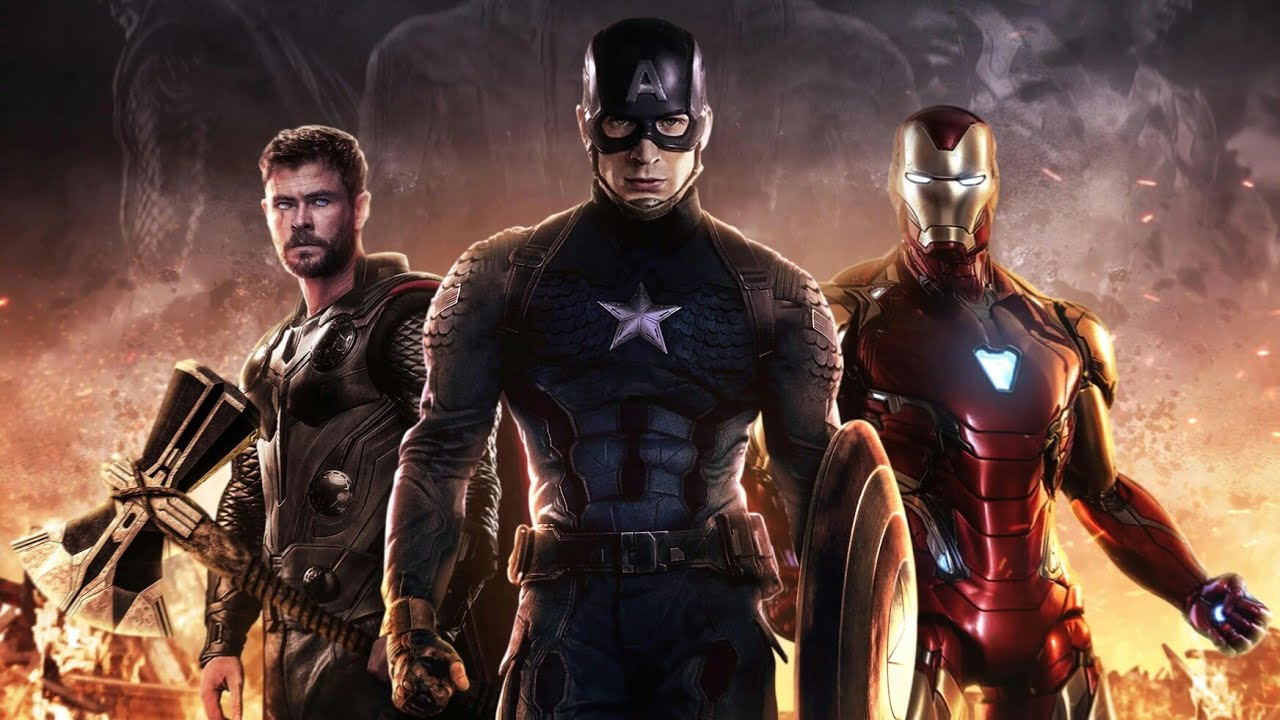

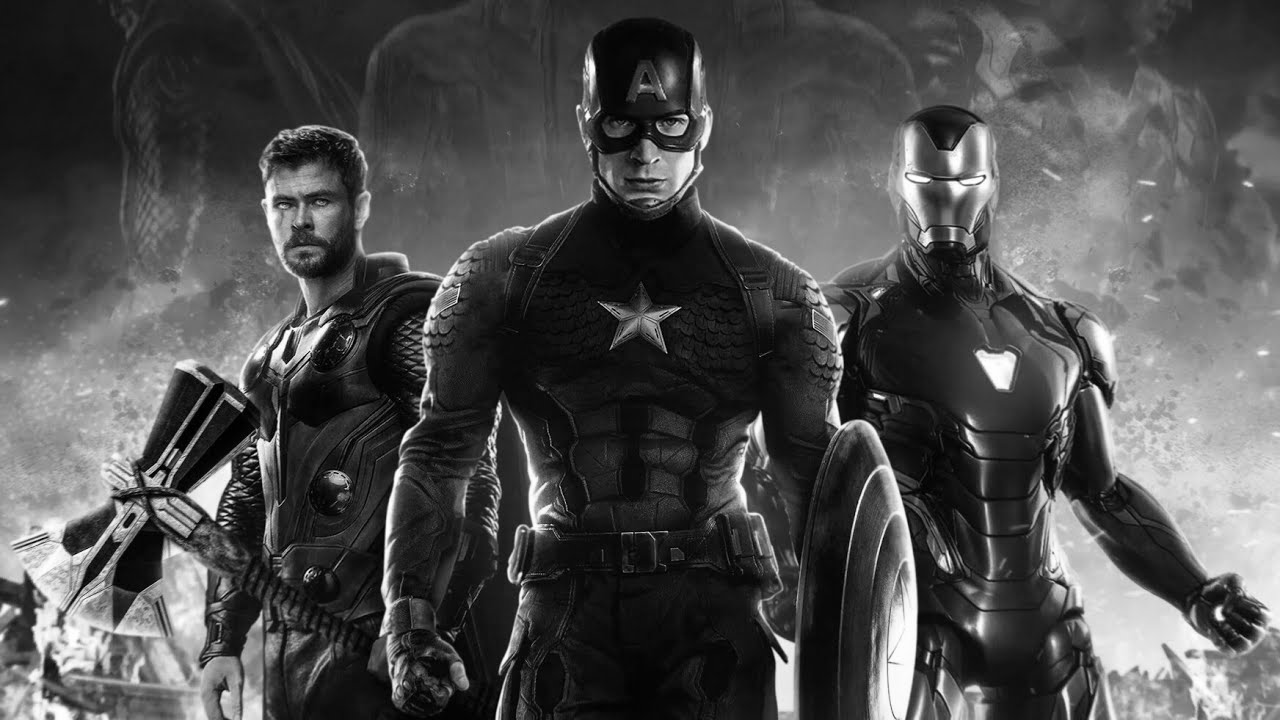

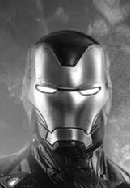

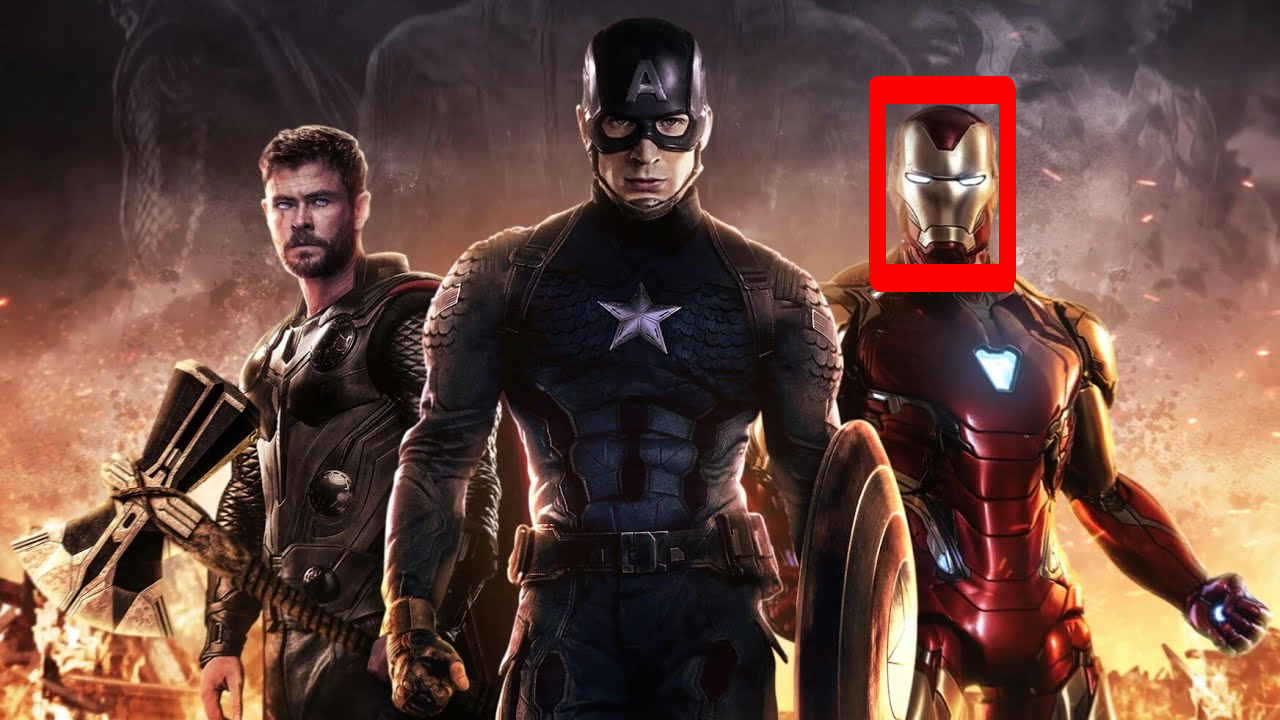

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read images
img = cv2.imread("/content/avengers.jpg")
if img is None:
    raise ValueError("Image not found at path: /content/avengers.jpg")

grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread("/content/temple.png", 0)  # Already grayscale
if template is None:
    raise ValueError("Template not found at path: /content/temple.png")

# Get width and height of the template
w, h = template.shape[::-1]

# Display original images
cv2_imshow(img)

# Display grayscale images
cv2_imshow(grey_img)
cv2_imshow(template)  # Directly display the grayscale template

# Template matching
res = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED)

# Set a threshold (adjust as needed)
threshold = 0.93 # You might need to adjust this threshold value

# Find all matches above the threshold
loc = np.where(res >= threshold)

# Draw rectangles around detected matches
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display the result image
cv2_imshow(img)


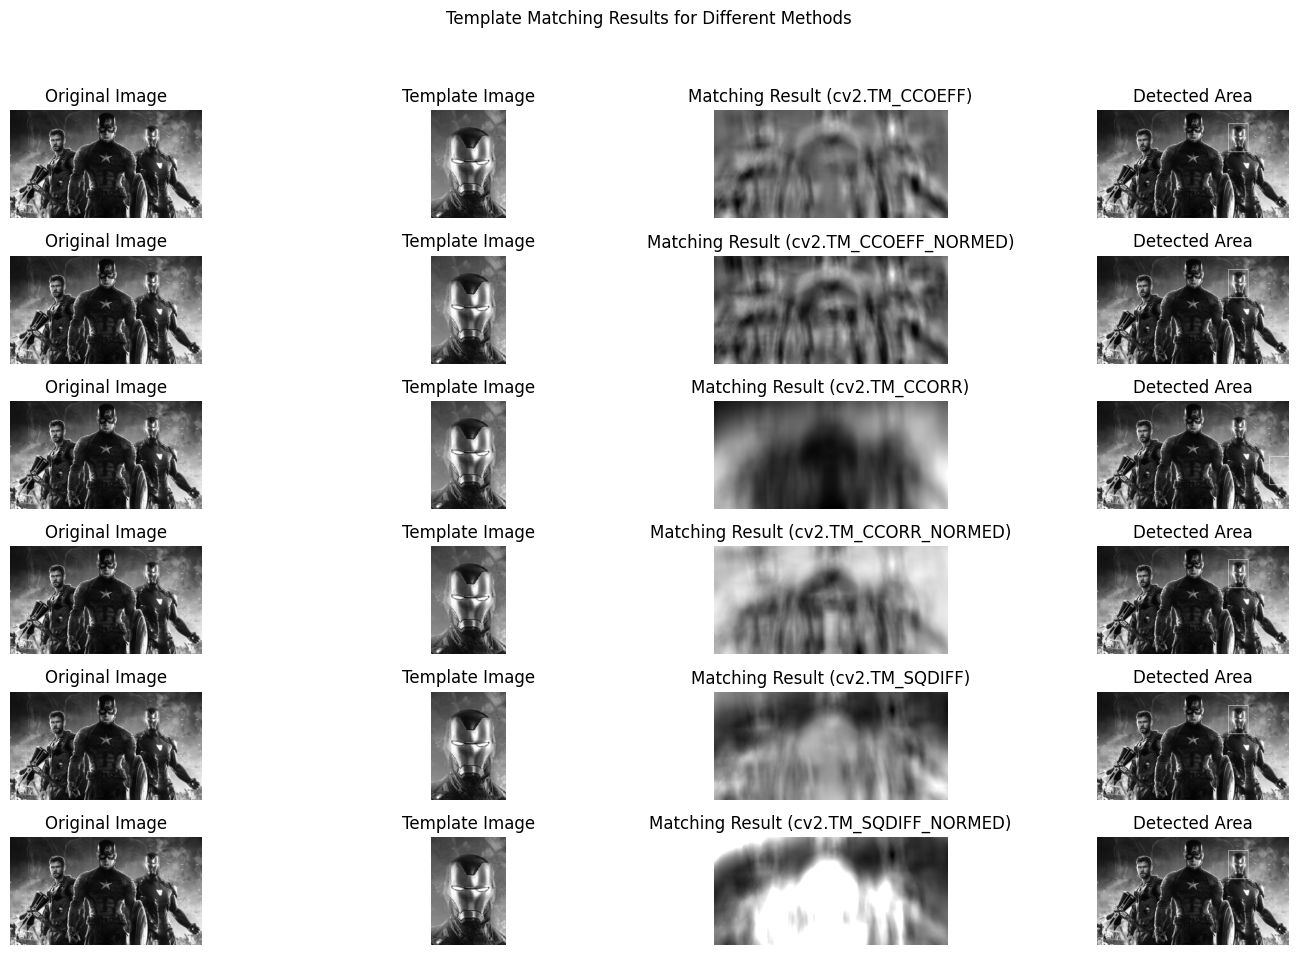

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load images
img = cv2.imread('/content/avengers.jpg', 0)
template = cv2.imread('/content/temple.png', 0)
img2 = img.copy()

# Get template dimensions
w, h = template.shape[::-1]

# Define methods
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Set up the plot grid
fig, axs = plt.subplots(len(methods), 4, figsize=(15, 10))
fig.suptitle('Template Matching Results for Different Methods')

# Process each method
for idx, meth in enumerate(methods):
    img = img2.copy()  # Reset the image for each method
    method = eval(meth)  # Evaluate the string to get OpenCV method

    # Apply template matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Choose location based on method
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle on the matched area in the image copy
    cv2.rectangle(img, top_left, bottom_right, (255, 0, 255), 2)

    # Display images in the grid
    # Column 1: Original image
    axs[idx, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axs[idx, 0].set_title('Original Image')
    axs[idx, 0].axis('off')

    # Column 2: Template image
    axs[idx, 1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
    axs[idx, 1].set_title('Template Image')
    axs[idx, 1].axis('off')

    # Column 3: Result of template matching
    axs[idx, 2].imshow(res, cmap='gray')
    axs[idx, 2].set_title(f"Matching Result ({meth})")
    axs[idx, 2].axis('off')

    # Column 4: Detected rectangle in the original image
    axs[idx, 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[idx, 3].set_title("Detected Area")
    axs[idx, 3].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
